In [20]:
#import library

##Load datasets & clean dataframes
import pandas as pd

##Mathematical operations on arrays
import numpy as np

import copy

##Run k modes algorithm
from kmodes.kmodes import KModes 

##Plot outputs
import matplotlib.pyplot as plt


In [21]:
#Load CSV file into a dataframe
df_Extract_norm = pd.read_csv("Dataset/FSExtract_Norm .csv",encoding='latin1')

df_Extract_norm = df_Extract_norm.dropna()

In [22]:
#Data processing

##delete the column in which we are not interested
df_Extract_norm = df_Extract_norm.drop(['StartFY', 'EndFY','FilingDate','Currency'], axis=1)

df_real_value=copy.deepcopy(df_Extract_norm)

## create 5 groups according to their Profit 

### determine the max and the min of the Profit
max_profit = df_Extract_norm['ProfitLossEUR'].max()
min_profit = df_Extract_norm['ProfitLossEUR'].min()

###determine the limit of each groups
group_profit_limits = np.linspace(max_profit, min_profit, num=6, endpoint=True)

###aplly function to create groups
repartition_func_profit = lambda x: 'Profit1' if x <= group_profit_limits[-2] else 'Profit2' if x <= group_profit_limits[-3] else 'Profit3' if x <= group_profit_limits[-4] else'Profit4' if x <= group_profit_limits[-5] else 'Profit5'

df_Extract_norm['ProfitLossEUR'] = df_Extract_norm['ProfitLossEUR'].apply(repartition_func_profit)

## create 5 groups according to their Asset

### determine the max and the min of the Asset
max_asset = df_Extract_norm['TotalAssetsEUR'].max()
min_asset = df_Extract_norm['TotalAssetsEUR'].min()

###determine the limit of each groups
group_asset_limits = np.linspace(max_asset, min_asset, num=6, endpoint=True)

###aplly function to create groups
repartition_func_asset = lambda x: 'Asset1' if x <= group_asset_limits[-2] else 'Asset2' if x <= group_asset_limits[-3] else 'Asset3' if x <= group_asset_limits[-4] else'Asset4' if x <= group_asset_limits[-5] else 'Asset5'

df_Extract_norm['TotalAssetsEUR'] = df_Extract_norm['TotalAssetsEUR'].apply(repartition_func_asset)

df_Kmode=df_Extract_norm.iloc[:, 1:]



Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 53368.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 53368.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 53368.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 53368.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 53368.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 52509.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 95, cost: 43179.0
Init: initializing centroids
Init: initializing clusters
Starting iteratio

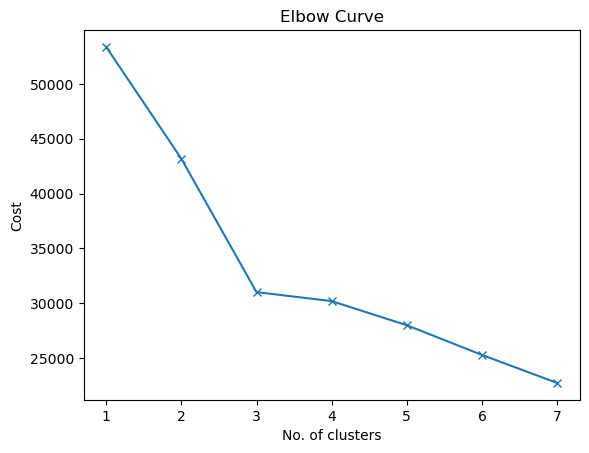

<Figure size 640x480 with 0 Axes>

In [23]:
#finding the good k for clustering

K = range(1,8)

cost = []

for k in list(K):
    kmode = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)
    kmode.fit_predict(df_Kmode)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'x-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')
plt.show()

In [24]:
#apply k mode algorithm with K=3

kmode_3 = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
clusters_3 = kmode_3.fit_predict(df_Kmode)
df_seg_cluster3 = pd.DataFrame(clusters_3, columns=['Cluster'])



Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 46298.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 46298.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 42968.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 5450, cost: 31019.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 50240.0
Best run was number 4


In [37]:
#join the cluster to the main dataframe

final_clustering=df_real_value.join(df_seg_cluster3).dropna()

final_clustering.to_excel('final_mode_3_cluster.xlsx', index=False)